In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch, torchvision
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as data
import numpy as np

In [2]:
train_data = pd.read_csv('train_data.csv')

In [3]:
train_data['class'] = pd.cut(x=train_data['SalePrice'], bins=[train_data['SalePrice'].min() - 1, 100000, 350000, train_data['SalePrice'].max() + 1], labels=[0,1,2])

In [4]:
features = ['YearBuilt', 'Size(sqf)', 'Floor', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)',  'N_manager',
       'N_elevators', 'N_FacilitiesInApt',
       'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']
to_predict = ['class']

In [5]:
train_data = train_data[features + to_predict]

In [6]:
df_train = train_data[:3800]
df_val = train_data[3800:]

In [7]:
train_dataset = data.TensorDataset(torch.from_numpy(df_train.values[:,:-1]).float(), torch.from_numpy(df_train.values[:,-1].astype(np.dtype('int64'))))
val_dataset = data.TensorDataset(torch.from_numpy(df_val.values[:,:-1]).float(), torch.from_numpy(df_val.values[:,-1].astype(np.dtype('int64'))))

In [8]:
next(iter(train_dataset))

(tensor([2006.,  814.,    3.,  111.,  184.,    3.,    0.,    5.,    6.,    9.]),
 tensor(1))

In [9]:
# train_data

In [10]:
# train_data.columns

In [11]:
# train_data.describe()

In [12]:
# fig = plt.figure(figsize = (15,20))
# ax = fig.gca()
# train_data.hist(ax=ax)

In [13]:
test_data = pd.read_csv('test_data.csv')

In [14]:
# test_data

In [15]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.layer1 = nn.Linear(10, 20)
        self.act_1 =  nn.ReLU()
        self.layer2 = nn.Linear(20, 40)
        self.act_2 = nn.ReLU()
        self.layer3 = nn.Linear(40, 10)
        self.act_3 = nn.ReLU()
        self.layer4 = nn.Linear(10, 3)
        self.act_4 = nn.ReLU()
        # self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.act_1(self.layer1(x))
        x = self.act_2(self.layer2(x))
        x = self.act_3(self.layer3(x))
        x = self.layer4(x)
        # x = self.softmax(x)
        return x

In [16]:
# def get_accuracy(model, data):
#     correct = 0
#     total = 0
#     model.eval()
#     for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
#         # imgs, labels = imgs.to(device), labels.to(device)
#         output = model(imgs)
#         # print('OUT', output)
#         pred = output.max(1, keepdim=True)[1] # get the index of the max logit
#         # print('PRED', pred)
#         correct += pred.eq(labels.view_as(pred)).sum().item()
#         total += imgs.shape[0]
#     return correct / total

In [17]:
model = Classifier()
train_loader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=32,
                                               shuffle=True) # shuffle after every epoch
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05, weight_decay=0)

In [18]:
def get_accuracy(model, data):
    correct = 0
    total = 0
    model.eval() #*********#
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
        # imgs, labels = imgs.to(device), labels.to(device)
        output = model(imgs)
        pred = output.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [19]:
def train(model, train, valid, batch_size=64, num_epochs=1, learn_rate=0.01, weight_decay=0):
    train_loader = torch.utils.data.DataLoader(train,
                                               batch_size=batch_size,
                                               shuffle=True) # shuffle after every epoch
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr=learn_rate, weight_decay=weight_decay )
#     optimizer = optim.SGD(model.parameters(), lr=learn_rate,momentum=0.9, weight_decay=weight_decay)

    epochs, iters, losses, train_acc, val_acc = [], [], [], [], []

    # training
#     n = 0 # the number of iterations
    idx = 0
    for n in range(num_epochs):
        epoch_loss = 0
        for imgs, labels in iter(train_loader):
            # imgs, labels = imgs.to(device), labels.to(device)
            model.train() 
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         

            # save the current training information
            
            iters.append(idx)
            epoch_loss += float(loss)
            # losses.append(float(loss)/batch_size)        # compute *average* loss
            train_acc.append(get_accuracy(model, train)) # compute training accuracy 
            val_acc.append(get_accuracy(model, valid))   # compute validation accuracy
            
            idx+=1
            
        losses.append(epoch_loss/(batch_size * len(train_loader))) 
        epochs.append(n)
        if n%10==0:
            print(f"Epoch {n}")
            
    plot_results(epochs, losses, iters, train_acc, val_acc)

            

In [20]:
def plot_results(epochs, losses, iters, train_acc, val_acc):
    # plotting
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Training Curve")
    plt.plot(epochs, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

Epoch 0
Epoch 10
Epoch 20
Epoch 30
Epoch 40


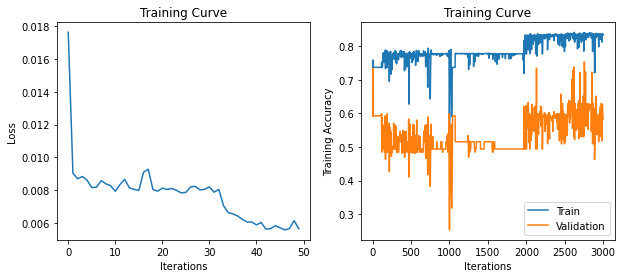

Final Training Accuracy: 0.8347368421052631
Final Validation Accuracy: 0.5833333333333334


In [21]:
train(model, train_dataset, val_dataset, num_epochs=50)

In [22]:
# losses

In [23]:
# train_acc_loader = torch.utils.data.DataLoader(df_train, batch_size=100)
# val_acc_loader = torch.utils.data.DataLoader(df_val, batch_size=1000)

In [24]:
# model = Classifier()
# train(model, train_dataset, val_dataset, num_epochs=30, learning_rate = 0.1)